# Environement set up details

## Installing locally (rather than colab)

Using `uv` (from https://docs.astral.sh/uv/)

```
# install uv in its own global location (using pipx)
pipx install uv
# create a virtual environment
uv venv
# activate the environment
source .venv/bin/activate
# install the Jupyter notebook packages
uv pip install ipykernel jupyter notebook
# install required packages
uv pip install networkx matplotlib

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import deque
import time
from IPython.display import clear_output

In [ ]:
def breadth_first_search(graph, start, goal):
    """
    Implements the Breadth-First Search algorithm.
    
    Args:
        graph: A dictionary representing the graph {node: [list of neighbors]}
        start: The starting node
        goal: The goal node to find
        
    Returns:
        path: List representing the path from start to goal, or None if no path exists
        visited_order: List of nodes in the order they were visited (for visualization)
        exploration_history: List of states of the queue at each step (for visualization)
    """
    # Initialize the queue with the start node
    queue = deque([(start, [start])])  # Each element is (node, path_to_node)
    
    # Keep track of visited nodes to avoid cycles
    visited = set([start])
    
    # For visualization purposes
    visited_order = [start]
    exploration_history = []
    
    while queue:
        # Save current state for visualization
        exploration_history.append(list(queue))
        
        # Dequeue the next node and its path
        current_node, path = queue.popleft()
        
        # Check if we've reached the goal
        if current_node == goal:
            return path, visited_order, exploration_history
        
        # Add all unvisited neighbors to the queue
        for neighbor in graph.get(current_node, []):
            if neighbor not in visited:
                visited.add(neighbor)
                visited_order.append(neighbor)
                queue.append((neighbor, path + [neighbor]))
    
    # If we get here, there's no path to the goal
    return None, visited_order, exploration_history

In [ ]:




def visualize_bfs(graph, start, goal, delay=1.0):
    """
    Visualizes the BFS algorithm step by step.
    
    Args:
        graph: A dictionary representing the graph {node: [list of neighbors]}
        start: The starting node
        goal: The goal node to find
        delay: Delay between steps in seconds
    """
    # Create a networkx graph for visualization
    G = nx.Graph()
    
    # Add edges to the graph
    for node, neighbors in graph.items():
        for neighbor in neighbors:
            G.add_edge(node, neighbor)
    
    # Run BFS and get visualization data
    path, visited_order, exploration_history = breadth_first_search(graph, start, goal)
    
    # Create a nice layout
    pos = nx.spring_layout(G, seed=42)
    
    # Initial display of the graph
    plt.figure(figsize=(12, 8))
    nx.draw(G, pos, with_labels=True, node_color='lightblue', 
            node_size=500, font_size=10, font_weight='bold')
    plt.title(f"BFS from {start} to {goal}")
    plt.pause(delay)
    
    # Colors for different node states
    node_colors = {
        'unvisited': 'lightblue',
        'in_queue': 'yellow',
        'visited': 'lightgray',
        'current': 'red',
        'path': 'green',
        'start': 'blue',
        'goal': 'purple'
    }
    
    # Visualize each step of BFS
    current_visited = set()
    
    for i, (state) in enumerate(exploration_history):
        clear_output(wait=True)
        plt.figure(figsize=(12, 8))
        
        # Prepare node colors for current state
        colors = []
        for node in G.nodes():
            if node == start:
                colors.append(node_colors['start'])
            elif node == goal:
                colors.append(node_colors['goal'])
            elif node in [n for n, _ in state]:
                colors.append(node_colors['in_queue'])
            elif node in current_visited:
                colors.append(node_colors['visited'])
            else:
                colors.append(node_colors['unvisited'])
        
        # Draw the graph
        nx.draw(G, pos, with_labels=True, node_color=colors, 
                node_size=500, font_size=10, font_weight='bold')
        
        # Display queue state
        queue_text = f"Queue: {[n for n, _ in state]}"
        plt.figtext(0.5, 0.01, queue_text, ha="center", fontsize=10, 
                    bbox={"facecolor":"white", "alpha":0.5, "pad":5})
        
        plt.title(f"BFS Step {i+1} - Exploring from {start} to {goal}")
        plt.pause(delay)
        
        # Update visited nodes for next iteration
        if i < len(visited_order):
            current_visited.add(visited_order[i])
    
    # Display final result
    clear_output(wait=True)
    plt.figure(figsize=(12, 8))
    
    # Color nodes based on final state
    colors = []
    for node in G.nodes():
        if node == start:
            colors.append(node_colors['start'])
        elif node == goal:
            colors.append(node_colors['goal'])
        elif path and node in path:
            colors.append(node_colors['path'])
        elif node in current_visited:
            colors.append(node_colors['visited'])
        else:
            colors.append(node_colors['unvisited'])
    
    # Draw the graph
    nx.draw(G, pos, with_labels=True, node_color=colors, 
            node_size=500, font_size=10, font_weight='bold')
    
    if path:
        # Highlight path edges
        path_edges = [(path[i], path[i+1]) for i in range(len(path)-1)]
        nx.draw_networkx_edges(G, pos, edgelist=path_edges, width=2.0, edge_color='green')
        plt.title(f"BFS Complete: Path found from {start} to {goal} → {path}")
    else:
        plt.title(f"BFS Complete: No path found from {start} to {goal}")
    
    # Add legend
    plt.figtext(0.01, 0.01, "Blue: Start, Purple: Goal, Green: Path, Yellow: In Queue, Gray: Visited", 
                fontsize=10, bbox={"facecolor":"white", "alpha":0.5, "pad":5})
    plt.show()

# Example usage
if __name__ == "__main__":
    # Create a sample graph
    sample_graph = {
        'A': ['B', 'C'],
        'B': ['A', 'D', 'E'],
        'C': ['A', 'F', 'G'],
        'D': ['B', 'H'],
        'E': ['B', 'I'],
        'F': ['C'],
        'G': ['C', 'J'],
        'H': ['D'],
        'I': ['E', 'J'],
        'J': ['G', 'I']
    }
    
    start_node = 'A'
    goal_node = 'J'
    
    # Run the visualization
    visualize_bfs(sample_graph, start_node, goal_node, delay=1.0)



In [6]:

# Example with a grid-based maze
def create_maze_graph(maze):
    """
    Converts a 2D maze into a graph.
    0 represents open paths, 1 represents walls.
    
    Args:
        maze: 2D list representing the maze
        
    Returns:
        A dictionary representing the graph {node: [list of neighbors]}
    """
    graph = {}
    rows, cols = len(maze), len(maze[0])
    
    # Possible movements: up, right, down, left
    directions = [(-1, 0), (0, 1), (1, 0), (0, -1)]
    
    for r in range(rows):
        for c in range(cols):
            # Skip walls
            if maze[r][c] == 1:
                continue
                
            node = (r, c)
            neighbors = []
            
            # Check all four directions
            for dr, dc in directions:
                nr, nc = r + dr, c + dc
                if (0 <= nr < rows and 0 <= nc < cols and maze[nr][nc] == 0):
                    neighbors.append((nr, nc))
            
            graph[node] = neighbors
    
    return graph

def visualize_maze_bfs(maze, start, goal, delay=0.5):
    """
    Visualizes BFS on a maze.
    
    Args:
        maze: 2D list representing the maze (0=path, 1=wall)
        start: Starting position (row, col)
        goal: Goal position (row, col)
        delay: Delay between steps in seconds
    """
    # Convert maze to graph
    graph = create_maze_graph(maze)
    
    # Run BFS
    path, visited_order, _ = breadth_first_search(graph, start, goal)
    
    rows, cols = len(maze), len(maze[0])
    
    # Visualization
    plt.figure(figsize=(10, 10))
    
    # For coloring
    cmap = plt.cm.colors.ListedColormap(['white', 'black', 'yellow', 'green', 'red', 'blue', 'purple'])
    bounds = [-0.5, 0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]
    norm = plt.cm.colors.BoundaryNorm(bounds, cmap.N)
    
    # Animate the search
    maze_copy = [row[:] for row in maze]
    
    # Mark start and goal
    maze_copy[start[0]][start[1]] = 5  # blue
    maze_copy[goal[0]][goal[1]] = 6    # purple
    
    plt.imshow(maze_copy, cmap=cmap, norm=norm)
    plt.title("BFS Maze Search - Initial State")
    plt.xticks([]), plt.yticks([])
    plt.pause(delay)
    
    # Visualize visited nodes
    for node in visited_order:
        if node != start and node != goal:
            maze_copy[node[0]][node[1]] = 2  # yellow
            clear_output(wait=True)
            plt.imshow(maze_copy, cmap=cmap, norm=norm)
            plt.title(f"BFS Maze Search - Exploring...")
            plt.xticks([]), plt.yticks([])
            plt.pause(delay * 0.5)
    
    # Visualize the path
    if path:
        for node in path:
            if node != start and node != goal:
                maze_copy[node[0]][node[1]] = 3  # green
        
        clear_output(wait=True)
        plt.imshow(maze_copy, cmap=cmap, norm=norm)
        plt.title(f"BFS Maze Search - Path Found!")
        plt.xticks([]), plt.yticks([])
    else:
        plt.title("BFS Maze Search - No Path Found!")
    
    # Add legend
    legend_elements = [
        plt.Rectangle((0, 0), 1, 1, color='white', label='Path'),
        plt.Rectangle((0, 0), 1, 1, color='black', label='Wall'),
        plt.Rectangle((0, 0), 1, 1, color='yellow', label='Visited'),
        plt.Rectangle((0, 0), 1, 1, color='green', label='Final Path'),
        plt.Rectangle((0, 0), 1, 1, color='blue', label='Start'),
        plt.Rectangle((0, 0), 1, 1, color='purple', label='Goal')
    ]
    plt.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=3)
    plt.show()

# Example maze
maze = [
    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
    [0, 1, 1, 0, 1, 0, 1, 1, 1, 0],
    [0, 1, 0, 0, 0, 0, 0, 0, 1, 0],
    [0, 1, 0, 1, 1, 1, 1, 0, 1, 0],
    [0, 1, 0, 0, 0, 0, 1, 0, 1, 0],
    [0, 1, 1, 1, 1, 0, 1, 0, 1, 0],
    [0, 0, 0, 0, 1, 0, 0, 0, 1, 0],
    [0, 1, 1, 0, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 1, 1, 1, 1, 0],
]

# Example of using the maze visualization
start_pos = (0, 0)
goal_pos = (8, 8)

# You can run this to visualize BFS on the maze
# visualize_maze_bfs(maze, start_pos, goal_pos)

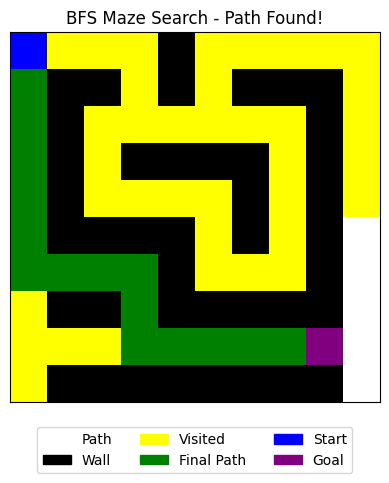

In [8]:
# You can run this to visualize BFS on the maze
visualize_maze_bfs(maze, start_pos, goal_pos)